Transfer Learning Inception V3 using Keras

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [8]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton disease prediction/train'
valid_path = '/content/drive/MyDrive/Cotton disease prediction/test'

In [9]:
# Import Inception V3. Adding a preprocessing layer to it
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [10]:
# ensure existing weights are not trained
for layer in inception.layers:
    layer.trainable = False


In [11]:
# securing output classes
folders = glob('/content/drive/MyDrive/Cotton disease prediction/train/*')

In [12]:
x = Flatten()(inception.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


In [14]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) #data augmentation is not done for test dataset.

In [17]:
# setting up training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton disease prediction/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton disease prediction/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 637s 10s/step - loss: 2.9651 - accuracy: 0.7335 - val_loss: 0.7429 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 35s 578ms/step - loss: 0.5567 - accuracy: 0.8995 - val_loss: 0.0693 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 37s 600ms/step - loss: 0.4975 - accuracy: 0.9077 - val_loss: 0.5892 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 35s 569ms/step - loss: 0.4867 - accuracy: 0.9170 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 36s 596ms/step - loss: 0.6206 - accuracy: 0.9052 - val_loss: 0.6589 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 34s 564ms/step - loss: 0.3684 - accuracy: 0.9380 - val_loss: 0.3769 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 36s 597ms/step - loss: 0.4833 - accuracy: 0.9272 - val_loss: 0.0097 - val_accuracy: 1.0000


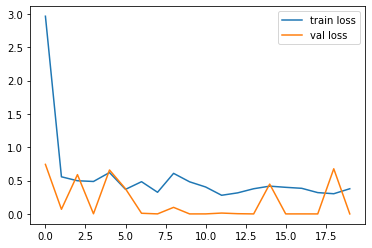

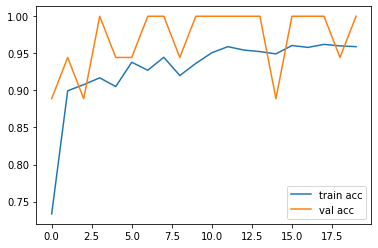

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:
#test set predictions
y_pred = model.predict(test_set)


In [23]:
y_pred

array([[2.4206424e-08, 2.2269258e-13, 2.1126175e-17, 1.0000000e+00],
       [7.1953753e-22, 1.0000000e+00, 2.0546207e-18, 1.2801533e-09],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.4787590e-12, 1.8553946e-07, 6.7708582e-15, 9.9999976e-01],
       [2.4553606e-16, 3.1203069e-06, 8.1019386e-14, 9.9999690e-01],
       [1.0000000e+00, 1.4178796e-31, 2.3046419e-25, 0.0000000e+00],
       [1.2107142e-10, 1.5598517e-24, 1.0000000e+00, 8.8118606e-21],
       [3.9889127e-29, 1.0000000e+00, 1.8702735e-20, 4.2904140e-14],
       [6.6379184e-32, 9.2211232e-37, 2.6086368e-38, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 7.9903097e-27, 1.0978078e-37],
       [1.0093505e-13, 4.6415003e-12, 1.0000000e+00, 4.2482051e-27],
       [0.0000000e+00, 1.0000000e+00, 1.7775554e-34, 5.3457527e-33],
       [6.0702932e-09, 3.8366503e-17, 1.0000000e+00, 3.1171246e-12],
       [9.9889225e-01, 1.1077842e-03, 4.5825606e-20, 7.1124405e-18],
       [0.0000000e+00, 1.0000000e+

In [24]:
#selecting predictions that model is most confident about
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([3, 1, 1, 3, 3, 0, 2, 1, 3, 0, 2, 1, 2, 0, 1, 2, 3, 2])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_inception.h5')

In [33]:
img = image.load_img('/content/drive/MyDrive/Cotton disease prediction/val/diseased cotton leaf/dis_leaf (100)_iaip.jpg',target_size=(224,224))

In [34]:
x = image.img_to_array(img)
x

array([[[175., 233., 157.],
        [177., 235., 159.],
        [178., 236., 160.],
        ...,
        [ 74.,  64.,  55.],
        [ 69.,  62.,  56.],
        [ 69.,  62.,  56.]],

       [[177., 235., 159.],
        [179., 237., 161.],
        [180., 238., 162.],
        ...,
        [ 69.,  59.,  50.],
        [ 60.,  53.,  47.],
        [ 59.,  52.,  46.]],

       [[178., 236., 160.],
        [180., 238., 162.],
        [182., 240., 164.],
        ...,
        [ 65.,  55.,  46.],
        [ 59.,  52.,  46.],
        [ 59.,  52.,  46.]],

       ...,

       [[115., 181., 120.],
        [109., 175., 114.],
        [108., 174., 113.],
        ...,
        [138., 216., 106.],
        [142., 221., 104.],
        [142., 221., 104.]],

       [[121., 181., 119.],
        [116., 176., 114.],
        [113., 173., 111.],
        ...,
        [140., 218., 108.],
        [143., 216., 108.],
        [145., 218., 110.]],

       [[118., 178., 116.],
        [117., 177., 115.],
        [116., 1

In [35]:
#Normalizing the image
x=x/255 

In [36]:
#preprocessing data
import numpy as np
x = np.expand_dims(x,axis=0)
img_data= preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
#predicting the probabilities o
model.predict(img_data)

array([[9.9408036e-01, 1.5145018e-05, 5.6863981e-03, 2.1800454e-04]],
      dtype=float32)

In [38]:
#selecting the class with the highest probability
a=np.argmax(model.predict(img_data),axis=1)

In [40]:
# zero here stands for diseased cotton leaf, out of the 4 options which are diseased cotton leaf, diseased cotton plant, 
a==0

array([ True])